In [25]:
import networkx as nx
import time

def WLC(path,sep):
    #path: the path of txt file containing edges of graph
    # sep : the used separator in the file of edges
    t=[]
    tri=[]
    
    #G=nx.read_gml(path)#GML file
    G=nx.read_edgelist(path, comments='#', delimiter=sep, nodetype=int,encoding='utf-8')#txt file
    
    
    
    ns=len(G.nodes())# number of nodes in G
    N=G.number_of_edges()# number of edges in G
    
    t=[]
    den=nx.density(G)
    
    re=[]
    res=[]
    res1=[]
    res2=[]
    rr=[]
    #
    w1=[]
    tps1= time.time()#
    T11=list(G.nodes())# list of nodes
    #Compute the clustering coeficient of nodes in G
    i=0
    while i<len(T11):
        cpt1=0
        xx=list(G.neighbors(T11[i]))
        a=len(xx)
        j=0
        while j < a-1:
            j1=j+1
            while j1<a:
                if  G.has_edge(xx[j],xx[j1]):
                   cpt1=cpt1+1
                j1=j1+1
            j=j+1
        #aj=[cpt1,a]
        if a>1:
            w1.append(2*cpt1/(a*(a-1)))
        else:
            w1.append(0)
        i=i+1
    #print('b',w1)
    #w1 is the list of clustering coeficient of nodes in G
    T=G.nodes() #List of nodes in G
    while len(T)>0:
        nst=[]
        S=G.subgraph(T)# the subgraph of G containning elements in T
        for k in T:
            nst.append([S.degree(k),k])# list of nodes degrees in T 
    
        nst.sort(reverse=True) # sort of nodes degree 
        l=nst[0][1]# select the node with the highest node degree l
        ini=list(set(S.neighbors(l)))# list of neighbors of l
        ini.append(l)#add l to its list of neighbor to construct the initial community
        n=len(ini)
        n1=len(ini)
        #print('ini',ini)
        b=True
        # the supprsion of nodes with weak ties with the elements in ini
        
        while b==True:
        
            
            m1=[]
            temp=-1
            for r in ini:
                
                a=w1[T11.index(r)]# the clustering coeficient of r
                x=list(S.neighbors(r))# the neighbors of r
                #print(x)
                ww1=0#the clustering coeficient and common_neighbors similarity of the set of neighbors of r
                ww2=0#the clustering coeficient and common_neighbors similarity of neighbors of r belonging to ini
                if len(x)>0:
                    for rr1 in x:
                        d1=w1[T11.index(rr1)]
                        d=(d1+len(sorted(nx.common_neighbors(G, r, rr1))))#/(len(G.neighbors(rr1))+len(x))
                        #print(d)
                        ww1=ww1+d
                        if rr1 in ini:
                            ww2=ww2+d
                    if ww1>0:
                        bl=ww2/ww1# the weighted belonging degree of r
                        #print(r,':',bl)
                        if bl<0.5:
                        
                            ini.remove(r)   #remove r from initial community if its weighted belonging degree <0.5                       
            
                    
                        
                        
            #print(n1)
            #ini= list(set(ini)-set(m1))
            n1=len(ini) # the new size of the initial community 
            if  n1<n:  
                n=n1        
                b=True
            else:
                b=False # stop when the size of the initial community remain stable    
        
        
        b=1
        while b==1:
            x=[]
            for k in ini:   
                x.extend(G.neighbors(k))
                x=list(set(x)-set(ini))
            #x is the list of neighbors of elements in the initial community
            n=len(ini)
            m1=[]
            for r in x:
                
                x1=list(G.neighbors(r))
                #print(x)
                ww1=0#the clustering coeficient and common_neighbors similarity of the set of neighbors of r
                ww2=0#the clustering coeficient and common_neighbors similarity of neighbors of r belonging to ini
                if len(x1)>0:
                    for rr1 in x1:
                        d1=w1[T11.index(rr1)]
                        d=(d1+len(sorted(nx.common_neighbors(G, r, rr1))))#
                        ww1=ww1+d
                        if rr1 in ini:
                            ww2=ww2+d
                    if ww1>0:
                        bl=ww2/ww1# the weighted belonging degree of r
                        
                        if bl>=0.4:
                        
                            m1.append(r)# select the node r as its belonging degree >0.4  
                                                  
                
                
            ini.extend(m1)# expand the initial community with the node having their  belonging degree >0.4   
            n1=len(ini)  # the new lenght of the community   
            if n1>n:
                b=1
                
            else:   
                 
                    b=0#stop when the size of the community remain stable  
                    
                    break                   
        
        
        res.append(ini)# load the community in the list of communities
        
        
        rr.extend(ini)# list of selected nodes
        T=list(set(T)-set(ini))# keep only unselected nodes in T
        
        
        if (len(ini)==0):
            T.remove(l) # when the resulted community is empty ignore the node l in the selection of the node with highest node strength
        
    
    
    #print(res)
    
    
    tps2= time.time()
    m=0 
    fichier = open("results.txt", "w")
    for res1 in res:
        for k in res1:
            fichier.write(str(k-1))
            fichier.write(' ')
        fichier.write('\n')
    fichier.close()


def plot_comm(graph, label):
    communities={}
    i=0
    f = open('results.txt', 'r')
    Lines = f.readlines()

    for line in Lines:
        a = list(map(int,line.split()))
        for x in range(0,len(a)):
            a[x]=a[x]+1
        communities[i]=a
        i=i+1

    common_dict = defaultdict(lambda: 0)

    comm_color = dict()
    for i, comm in communities.items():
        comm_color |= {node: i + 10 for node in comm}

        for node in comm:
            common_dict[node] = common_dict[node] + 1

    fig, ax = plt.subplots(figsize=(12, 8))
    fig.tight_layout()

    pos = nx.spring_layout(graph, k=0.2, seed=4572321)

    overlapped_nodes = {node for node, n_comm in common_dict.items() if n_comm > 1}
    node_color = [0 if n in overlapped_nodes else comm_color[n] for n in graph]

    nx.draw_networkx(
        graph,
        ax=ax,
        pos=pos,
        with_labels=True,
        node_color=node_color,
        node_size=500,
        edge_color="#dbabab",
        alpha=0.4,
        font_weight="bold",
    )

    font = {"color": "k", "fontsize": 20, "weight": "light"}
    ax.set_title(label, font)
    plt.show()


In [26]:
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_comm(graph, label):
    communities={}
    i=0
    f = open('results.txt', 'r')
    Lines = f.readlines()

    for line in Lines:
        a = list(map(int,line.split()))
        for x in range(0,len(a)):
            a[x]=a[x]+1
        communities[i]=a
        i=i+1

    common_dict = defaultdict(lambda: 0)

    comm_color = dict()
    for i, comm in communities.items():
        comm_color |= {node: i + 10 for node in comm}

        for node in comm:
            common_dict[node] = common_dict[node] + 1

    fig, ax = plt.subplots(figsize=(12, 8))
    fig.tight_layout()

    pos = nx.spring_layout(graph, k=0.2, seed=4572321)

    overlapped_nodes = {node for node, n_comm in common_dict.items() if n_comm > 1}
    node_color = [0 if n in overlapped_nodes else comm_color[n] for n in graph]

    nx.draw_networkx(
        graph,
        ax=ax,
        pos=pos,
        with_labels=False,
        node_color=node_color,
        node_size=500,
        edge_color="#dbabab",
        alpha=0.4,
        font_weight="bold",
    )

    font = {"color": "k", "fontsize": 20, "weight": "light"}
    ax.set_title(label, font)
    plt.show()


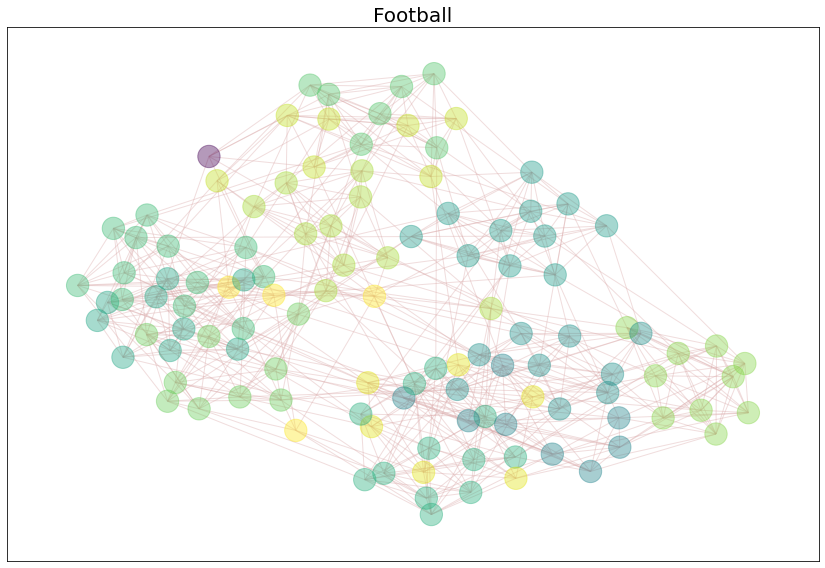

In [27]:
#football club dataset
graph = nx.read_gml (r"D:\\Documents\\NITS\\Semester VI\\(LAB) CS321 SNA\\football.gml", label = 'id') 
nx.write_edgelist (graph, r"football_wlc.txt", delimiter = ',')
f = r"football_wlc.txt"
WLC(f,',')
plot_comm(graph,"Football")

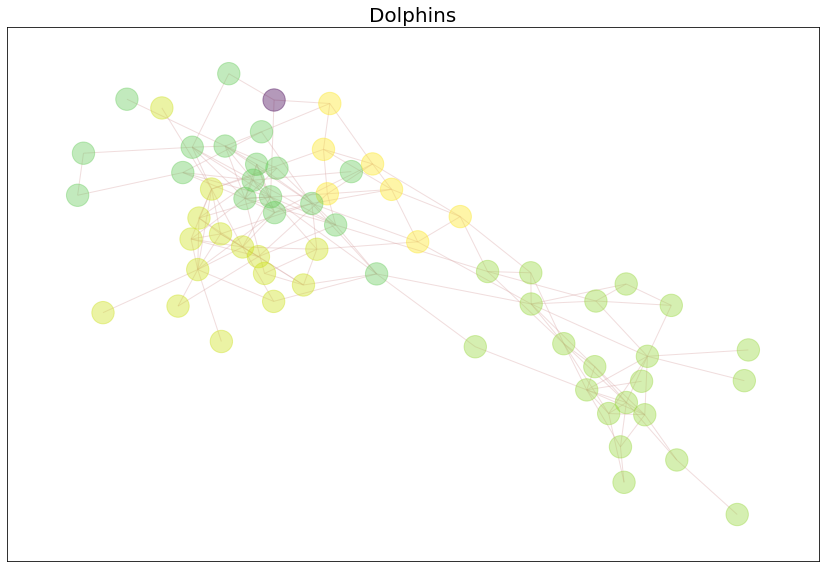

In [13]:
graph = nx.read_gml (r"D:\\Documents\\NITS\\Semester VI\\(LAB) CS321 SNA\\dolphins.gml", label = 'id')
nx.write_edgelist (graph, r"dolphins_wlc.txt", delimiter = ',')
f = r"dolphins_wlc.txt"
WLC(f,',')
plot_comm(graph,"Dolphins")

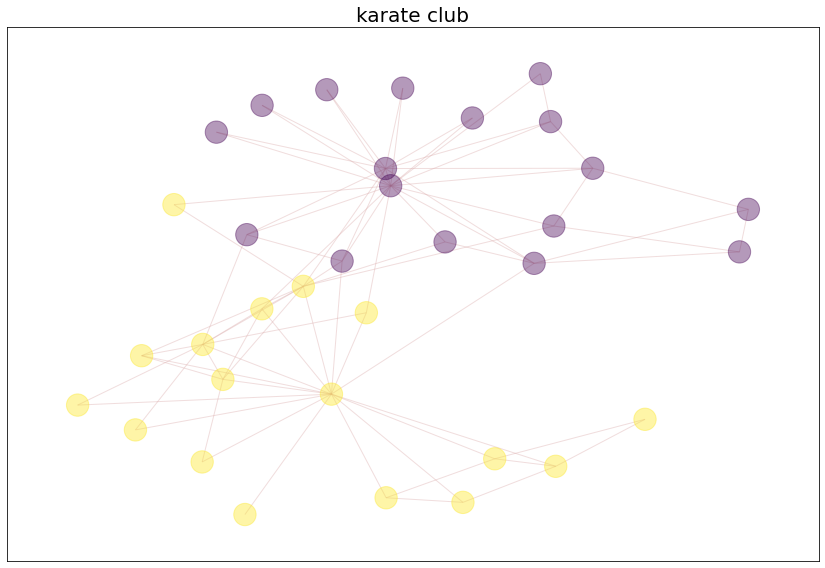

In [14]:
# dolphin network dataset
G = nx.read_gml (r"D:\\Documents\\NITS\\Semester VI\\(LAB) CS321 SNA\\karate.gml", label = 'id') 
nx.write_edgelist (G, r'karate_wlc.txt', delimiter = ',')
f = r"karate_wlc.txt"
WLC(f,',')
plot_comm(G,"karate club")

In [28]:
# WLC OVERLAPPING COMMUNITY ALGORITHM RESEARCH PAPER: https://dl.acm.org/doi/pdf/10.1145/3333165.3333172
# CODE REFERENCED FROM: https://github.com/khawka/WLC/blob/master/

import networkx as nx
import time
import matplotlib.pyplot as plt
from collections import defaultdict

def graphPlot (GG, label):
    community = {}
    ii = 0
    openResult = open ('results.txt', 'r')
    readLine = openResult.readlines ()

    for line in readLine:
        aa = list (map (int, line.split ()))
        for xx in range(0, len(aa)):
            aa [xx] = aa [xx] + 1
        community [ii] = aa
        ii = ii + 1

    comDict = defaultdict (lambda: 0)
    comColour = dict ()

    for ii, com in community.items ():
        comColour = {node: ii + 10 for node in com}
        for node in com:
            comDict [node] = comDict [node] + 1
    fig, ax = plt.subplots (figsize = (15, 15))
    fig.tight_layout ()

    pos = nx.spring_layout (GG, k = 0.2, seed = 4572321)
    
    overlappedNodes = {node for node, n_comm in comDict.items() if n_comm > 1}
    nodeColour = [0 if nn in overlappedNodes else comColour [nn] for nn in GG]

    nx.draw_networkx (GG, ax = ax, pos = pos, with_labels = False, node_color = nodeColour, node_size = 500, edge_color = "green", alpha = 0.4, font_weight = "bold")
    font = {"color": "k", "fontsize": 20, "weight": "light"}
    ax.set_title (label, font)
    plt.show ()

def modu1 (GG, NN, res):
    mm = 0
    for UU in res:
        nn = len (UU)
        SS = GG.subgraph (UU)
        rx = []
        for kx in res:
            if not kx == UU:
                rx.extend (kx)
        ov = list (set (UU).intersection (set (rx)))
        sum1 = 0
        ii = 0
        while ii < len (UU):
            jj = ii + 1
            while jj < len (UU):
                if UU [ii] in ov :                    
                    oo = SS.degree (UU [ii])            
                    oo1 = 0
                    for lx in res:
                        if UU [ii] in lx:
                            SS1 = GG.subgraph (lx)
                            oo1 = oo1 + SS1.degree (UU [ii])                    
                    al1 = oo / oo1
                else:   
                    al1 = 1 
                if UU [jj] in ov:                    
                    ox = SS.degree (UU [jj])                  
                    ox1 = 0
                    for lx in res:
                        if UU [jj] in lx:
                            SS1 = GG.subgraph (lx)
                            ox1 = ox1 + SS1.degree (UU [jj]) 
                    al2 = ox / ox1    
                else :   
                    al2 = 1
                # tt = 2 * cpt
                if GG.has_edge (UU [jj], UU [ii]):
                    xx = ((1 - ((GG.degree (UU [ii]) * GG.degree (UU [jj])) / (2 * NN))) * al1 * al2)
                    sum1 = sum1 + 2 * xx  
                else:                    
                    sum1 = sum1 + 2 * ((0 - ((GG.degree (UU [ii]) * GG.degree (UU [jj])) / (2 * NN))) * al1 * al2)
                jj = jj + 1
            ii = ii + 1
        mm = mm + sum1
    mm = mm / (2 * NN) # compute the total modularity 
    return (mm)

def WLC (path, label):
    # path : the path of txt file containing edges of graph

    tt = []
    tri = []
    
    GG = nx.read_gml (path, label = 'id') # GML file
    nx.write_edgelist (GG, 'tempEdgeList.txt', delimiter = ',')
    GG = nx.read_edgelist ('tempEdgeList.txt', comments = '#', delimiter = ',', nodetype = int, encoding = 'utf-8') # txt file
    ns = len (GG.nodes ()) # number of nodes in GG
    NN = GG.number_of_edges () # number of edges in GG
    tt = []
    den = nx.density (GG)
    re = []
    res = []
    res1 = []
    res2 = []
    rx = []
    ww1 = []
    tps1 = time.time ()
    T11 = list (GG.nodes ()) # list of nodes
    # Compute the clustering coeficient of nodes in GG
    ii = 0
    while ii < len (T11):
        cpt1 = 0
        zx = list (GG.neighbors (T11 [ii]))
        aa = len (zx)
        jj = 0
        while jj < aa - 1:
            jj1 = jj + 1
            while jj1 < aa:
                if  GG.has_edge (zx [jj], zx [jj1]):
                   cpt1 = cpt1+1
                jj1 = jj1 + 1
            jj = jj + 1
        # aj = [cpt1, aa]
        if aa > 1:
            ww1.append (2 * cpt1 / (aa * (aa - 1)))
        else:
            ww1.append (0)
        ii = ii + 1
    # print ('b', ww1)
    # ww1 is the list of clustering coeficient of nodes in GG
    TT = GG.nodes () # List of nodes in GG
    while len (TT) > 0:
        nst = []
        SS = GG.subgraph (TT) # the subgraph of GG containning elements in TT
        for kk in TT:
            nst.append ([SS.degree (kk), kk]) # list of nodes degrees in TT  
        nst.sort (reverse = True) # sort of nodes degree 
        ll = nst [0][1] # select the node with the highest node degree ll
        print ('PROCESSING NODE ', ll)
        ini = list (set (SS.neighbors (ll))) # list of neighbors of ll
        ini.append (ll) # add ll to its list of neighbor to construct the initial community
        nn = len (ini)
        nn1 = len (ini)
        # print ('ini', ini)
        bb = True
        # the supprsion of nodes with weak ties with the elements in ini
        while bb == True:
            mm1 = []
            temp = -1
            for rr in ini:
                aa = ww1 [T11.index (rr)] # the clustering coeficient of rr
                xx = list (SS.neighbors (rr)) # the neighbors of rr
                # print (xx)
                wx1 = 0 # the clustering coeficient and common_neighbors similarity of the set of neighbors of rr
                wx2 = 0 # the clustering coeficient and common_neighbors similarity of neighbors of rr belonging to ini
                if len (xx) > 0:
                    for rx1 in xx:
                        dd1 = ww1 [T11.index (rx1)]
                        dd = (dd1 + len (sorted (nx.common_neighbors (GG, rr, rx1)))) # /(len (GG.neighbors (rr1)) + len(xx))
                        # print (dd)
                        wx1 = wx1 + dd 
                        if rx1 in ini:
                            wx2 = wx2 + dd
                    if wx1 > 0:
                        bl = wx2 / wx1 # the weighted belonging degree of rr
                        # print (rr, ':' , bl)
                        if bl < 0.5:
                            ini.remove (rr)   # remove rr from initial community if its weighted belonging degree < 0.5
            # print (nn1)
            # ini = list (set (ini) - set (mm1))
            nn1 = len (ini) # the new size of the initial community 
            if  nn1 < nn:  
                nn = nn1        
                bb = True
            else:
                bb = False # stop when the size of the initial community remain stable    
        bb = 1
        # print ('EXPANSION OF COMMUNITY')
        while bb == 1:
            xx = []
            for kk in ini:   
                xx.extend (GG.neighbors (kk))
                xx = list (set (xx) - set (ini))
            # xx is the list of neighbors of elements in the initial community
            nn = len (ini)
            mm1 = []
            for rr in xx:                
                xx1 = list (GG.neighbors (rr))
                # print (xx)
                wx1 = 0 # the clustering coeficient and common_neighbors similarity of the set of neighbors of rr
                wx2 = 0 # the clustering coeficient and common_neighbors similarity of neighbors of rr belonging to ini
                if len (xx1) > 0:
                    for rx1 in xx1:
                        dd1 = ww1 [T11.index (rx1)]
                        dd = (dd1 + len (sorted (nx.common_neighbors (GG, rr, rx1))))
                        wx1 = wx1 + dd
                        if rx1 in ini:
                            wx2 = wx2 + dd
                    if wx1 > 0:
                        bl = wx2 / wx1 # the weighted belonging degree of rr
                        if bl >= 0.4:
                            mm1.append (rr) # select the node rr as its belonging degree > 0.4
            ini.extend (mm1) # expand the initial community with the node having their belonging degree > 0.4   
            nn1 = len (ini)  # the new lenght of the community   
            if nn1 > nn:
                bb = 1
            else:   
                bb = 0 # stop when the size of the community remain stable  
                break                   
        res.append (ini) # load the community in the list of communities 
        rx.extend (ini) # list of selected nodes
        TT = list (set (TT) - set (ini)) # keep only unselected nodes in TT
        if (len (ini) == 0):
            TT.remove (ll) # when the resulted community is empty ignore the node ll in the selection of the node with highest node strength
    # print (res)
    tps2 = time.time ()
    # print ('TIME TAKEN: ', tps2 - tps1) # the consumed time in the algorithm
    mm = 0 
    newFile = open ("results.txt", "w")
    for res1 in res:
        for kk in res1:
            newFile.write (str (kk))
            newFile.write (' ')
        newFile.write ('\n')
    newFile.close ()
    # compute overlapping modularity
    mm = modu1 (GG, NN, res)
    print ("OVERLAPPING MODULARITY: ", mm)
    graphPlot (GG, label)


# KARATE CLUB
print ('\n\nKARATE CLUB\n')
WLC ('karate.gml', 'KARATE CLUB')

# FOOTBALL CLUB
print ('\n\nFOOTBALL CLUB\n')
WLC ("football.gml", 'FOOTBALL CLUB')

# DOLPHIN NETWORK
print ("\n\nDOLPHINS NETWORK\n")
WLC ("dolphins.gml", 'DOLPHIN NETWORK')



KARATE CLUB



FileNotFoundError: [Errno 2] No such file or directory: 'karate.gml'